In [ ]:
# 인공신경망을 구성하는 절차
# 1. 더미데이터 준비
# 2. 훈련용,검증용, 테스트용으로 분리
# 3. 심층(dense) 추가 후 모델에 적용
# 4. 컴파일 설정 (optimizer = adam)
# 5. 훈련(fit) 후 검증 (evaluate)

In [ ]:
# 손실곡선 : fit() 메서드로 모델을 훈련하는 동안의 과정을 상세히 확인가능
# fit() 메서드는 History 라는 클래스 객체를 반환함

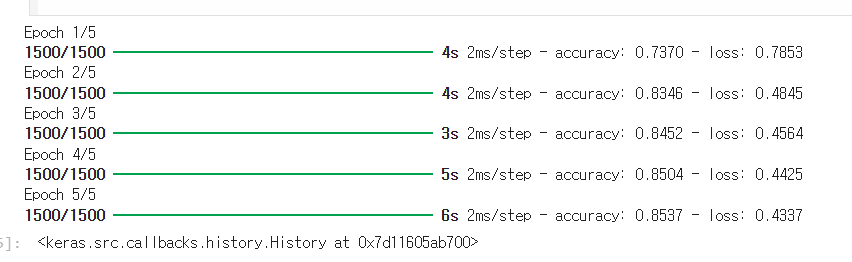

In [12]:
import tensorflow as tf
tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()  # 결정론적 동작으로 재현가능한 결과를 출력
# TF 버전 별 재현성 잡는 방법

from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

In [2]:
print(train_scaled.shape, train_target.shape)
print(test_input.shape, test_target.shape)
print(val_scaled.shape, val_target.shape)

(48000, 28, 28, 1) (48000,)
(10000, 28, 28) (10000,)
(12000, 28, 28, 1) (12000,)


In [3]:
def model_fn(a_layer=None):
    model = keras.Sequential()  # 순차적 모델
    model.add(keras.layers.Flatten(input_shape=(28, 28))) # 플래튼 (전처리)
    model.add(keras.layers.Dense(100, activation='relu')) # 렐루

    if a_layer:
        model.add(a_layer)  # 매개변수 입력시 모델에 해당 레이어 추가

    model.add(keras.layers.Dense(10, activation='softmax')) # 출력층
    return model

In [ ]:
# input_shape 대신 Input 레이어를 사용하는 것이 최신 권장 방식
# model.add(layers.Input(shape=(28, 28)))  # 첫 번째 레이어로 Input 사용
# model.add(layers.Flatten())  # Flatten 레이어

In [7]:
model = model_fn()
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
m.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [17]:
history = model.fit(train_scaled, train_target, epochs=5, verbose=1) # verbose 1 기본값, 0 은 훈련과정 안보임, 2 는 진행막대 빼고 출력

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9092 - loss: 0.2648
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9107 - loss: 0.2599
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9146 - loss: 0.2521
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9179 - loss: 0.2450
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9198 - loss: 0.2416


In [16]:
print(history)

In [19]:
print(history.history.keys())

dict_keys(['accuracy', 'loss'])


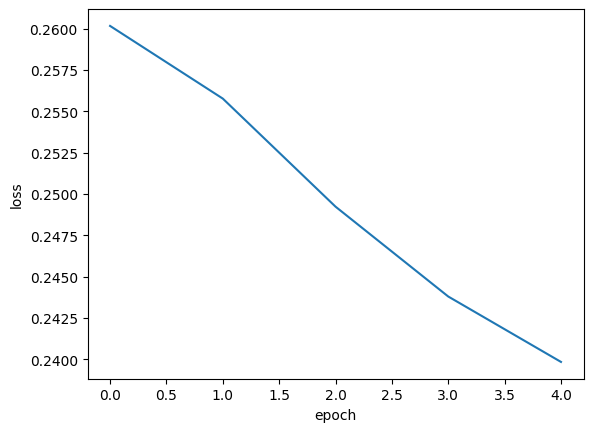

In [21]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss']) # 손실
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

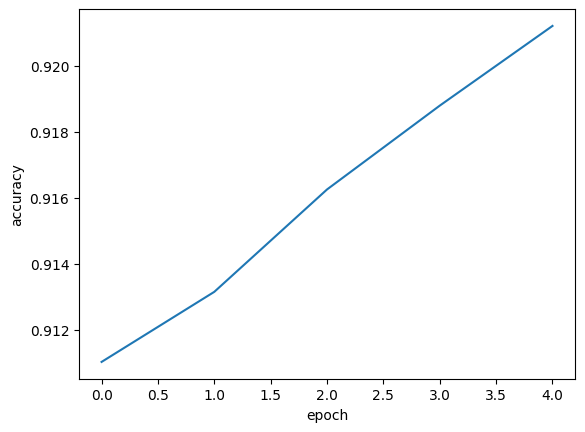

In [23]:
plt.plot(history.history['accuracy']) # 정확도
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [27]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_scaled, train_target, epochs=20, verbose=0)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


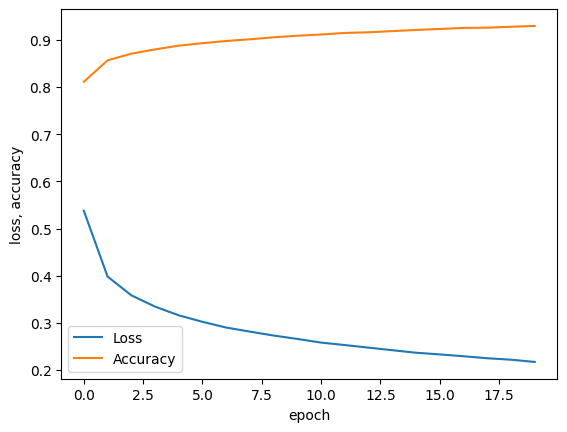

In [35]:
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['accuracy'], label='Accuracy')  # ← label 추가
plt.xlabel('epoch')
plt.ylabel('loss, accuracy')
plt.legend()  # label이 지정되었으므로 정상적으로 작동함
plt.show()

In [ ]:
# 검증 손실 validation_data = (val_scaled, val_target)
# 손실 함수 (Loss)는 모델이 예측값과 실제값 사이의 차이를 수치화한 것
# 정확도보다는 손실 함수의 값을 확인하는 것이 좋은 방법

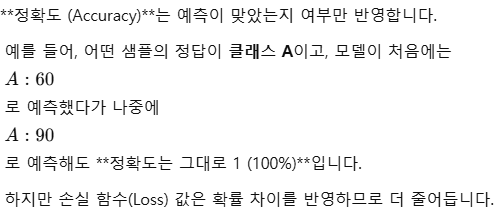

In [33]:
model = model_fn()
model.summary()
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_scaled, train_target, epochs=20, verbose=1, validation_data=(val_scaled, val_target)) # 검증손실을 구하기 위한 매개값 추가

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7639 - loss: 0.6860 - val_accuracy: 0.8476 - val_loss: 0.4321
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8497 - loss: 0.4148 - val_accuracy: 0.8618 - val_loss: 0.3856
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8668 - loss: 0.3680 - val_accuracy: 0.8663 - val_loss: 0.3719
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8765 - loss: 0.3408 - val_accuracy: 0.8692 - val_loss: 0.3683
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8848 - loss: 0.3195 - val_accuracy: 0.8684 - val_loss: 0.3756
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8912 - loss: 0.3052 - val_accuracy: 0.8717 - val_loss: 0.3731
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8958 - loss: 0.2926 - val_accuracy: 0.8700 - val_loss: 0.3851
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8999 - loss: 0.2836 

In [37]:
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


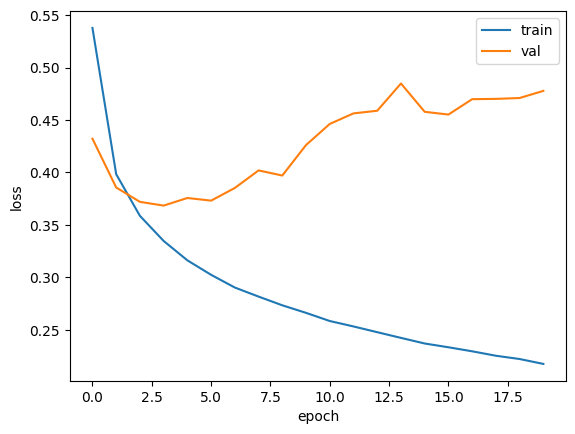

In [40]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()
# 검증 손실이 잘 개선되지 않음 -> 과대적합 -> (여러 개선방안 중)드롭아웃 시도

In [50]:
model = model_fn()
model.compile(optimizer='RMSprop', loss='sparse_categorical_crossentropy', metrics=['accuracy']) # optimizer 설정 추가

history = model.fit(train_scaled, train_target, epochs=20, verbose=2, validation_data=(val_scaled, val_target))

Epoch 1/20
1500/1500 - 6s - 4ms/step - accuracy: 0.8116 - loss: 0.5298 - val_accuracy: 0.8488 - val_loss: 0.4273
Epoch 2/20
1500/1500 - 10s - 7ms/step - accuracy: 0.8573 - loss: 0.3914 - val_accuracy: 0.8543 - val_loss: 0.4093
Epoch 3/20
1500/1500 - 5s - 3ms/step - accuracy: 0.8727 - loss: 0.3513 - val_accuracy: 0.8565 - val_loss: 0.4015
Epoch 4/20
1500/1500 - 6s - 4ms/step - accuracy: 0.8828 - loss: 0.3280 - val_accuracy: 0.8587 - val_loss: 0.3974
Epoch 5/20
1500/1500 - 5s - 3ms/step - accuracy: 0.8899 - loss: 0.3109 - val_accuracy: 0.8610 - val_loss: 0.3930
Epoch 6/20
1500/1500 - 5s - 3ms/step - accuracy: 0.8950 - loss: 0.2993 - val_accuracy: 0.8637 - val_loss: 0.3919
Epoch 7/20
1500/1500 - 5s - 3ms/step - accuracy: 0.9010 - loss: 0.2875 - val_accuracy: 0.8705 - val_loss: 0.3859
Epoch 8/20
1500/1500 - 5s - 4ms/step - accuracy: 0.9039 - loss: 0.2793 - val_accuracy: 0.8652 - val_loss: 0.4083
Epoch 9/20
1500/1500 - 6s - 4ms/step - accuracy: 0.9069 - loss: 0.2702 - val_accuracy: 0.8648 -

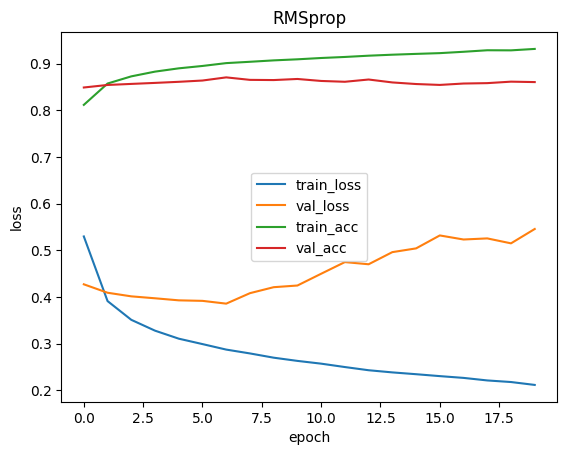

In [51]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('RMSprop')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train_loss', 'val_loss', 'train_acc', 'val_acc'])
plt.show()

In [44]:
model = model_fn()
model.compile(optimizer='Adagrad', loss='sparse_categorical_crossentropy', metrics=['accuracy']) # optimizer 설정 추가

history = model.fit(train_scaled, train_target, epochs=20, verbose=2, validation_data=(val_scaled, val_target))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
1500/1500 - 6s - 4ms/step - accuracy: 0.6513 - loss: 1.1570 - val_accuracy: 0.7247 - val_loss: 0.8565
Epoch 2/20
1500/1500 - 9s - 6ms/step - accuracy: 0.7524 - loss: 0.7721 - val_accuracy: 0.7605 - val_loss: 0.7337
Epoch 3/20
1500/1500 - 7s - 4ms/step - accuracy: 0.7778 - loss: 0.6894 - val_accuracy: 0.7804 - val_loss: 0.6768
Epoch 4/20
1500/1500 - 5s - 3ms/step - accuracy: 0.7916 - loss: 0.6445 - val_accuracy: 0.7914 - val_loss: 0.6416
Epoch 5/20
1500/1500 - 5s - 3ms/step - accuracy: 0.8001 - loss: 0.6152 - val_accuracy: 0.7992 - val_loss: 0.6170
Epoch 6/20
1500/1500 - 5s - 3ms/step - accuracy: 0.8073 - loss: 0.5938 - val_accuracy: 0.8043 - val_loss: 0.5983
Epoch 7/20
1500/1500 - 4s - 3ms/step - accuracy: 0.8124 - loss: 0.5772 - val_accuracy: 0.8090 - val_loss: 0.5836
Epoch 8/20
1500/1500 - 7s - 5ms/step - accuracy: 0.8167 - loss: 0.5638 - val_accuracy: 0.8131 - val_loss: 0.5714
Epoch 9/20
1500/1500 - 9s - 6ms/step - accuracy: 0.8194 - loss: 0.5526 - val_accuracy: 0.8164 - 

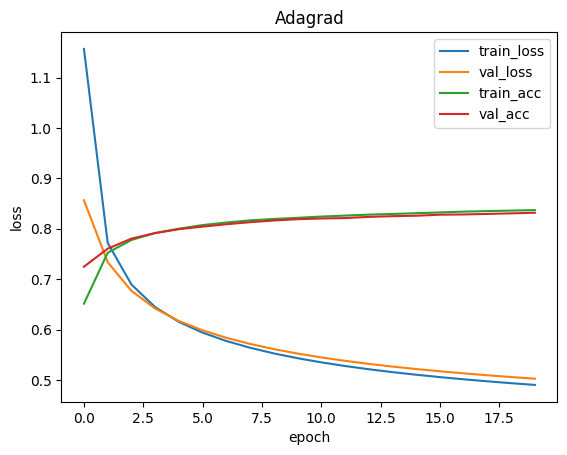

In [47]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Adagrad')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train_loss', 'val_loss', 'train_acc', 'val_acc'])
plt.show()

In [48]:
model = model_fn()
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy']) # optimizer 설정 추가

history = model.fit(train_scaled, train_target, epochs=20, verbose=2, validation_data=(val_scaled, val_target))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
1500/1500 - 7s - 5ms/step - accuracy: 0.8154 - loss: 0.5262 - val_accuracy: 0.8399 - val_loss: 0.4414
Epoch 2/20
1500/1500 - 5s - 3ms/step - accuracy: 0.8576 - loss: 0.3955 - val_accuracy: 0.8593 - val_loss: 0.3896
Epoch 3/20
1500/1500 - 5s - 3ms/step - accuracy: 0.8723 - loss: 0.3513 - val_accuracy: 0.8644 - val_loss: 0.3690
Epoch 4/20
1500/1500 - 6s - 4ms/step - accuracy: 0.8829 - loss: 0.3230 - val_accuracy: 0.8678 - val_loss: 0.3619
Epoch 5/20
1500/1500 - 5s - 3ms/step - accuracy: 0.8905 - loss: 0.3017 - val_accuracy: 0.8751 - val_loss: 0.3442
Epoch 6/20
1500/1500 - 6s - 4ms/step - accuracy: 0.8953 - loss: 0.2856 - val_accuracy: 0.8756 - val_loss: 0.3475
Epoch 7/20
1500/1500 - 9s - 6ms/step - accuracy: 0.9000 - loss: 0.2717 - val_accuracy: 0.8775 - val_loss: 0.3414
Epoch 8/20
1500/1500 - 10s - 7ms/step - accuracy: 0.9034 - loss: 0.2595 - val_accuracy: 0.8802 - val_loss: 0.3398
Epoch 9/20
1500/1500 - 10s - 7ms/step - accuracy: 0.9084 - loss: 0.2493 - val_accuracy: 0.8782 

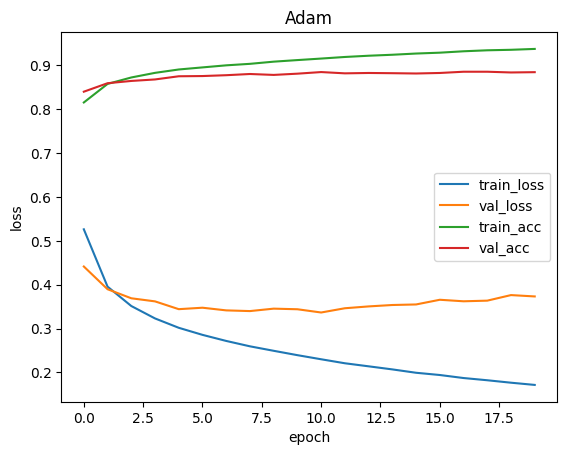

In [49]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Adam')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train_loss', 'val_loss', 'train_acc', 'val_acc'])
plt.show()

In [ ]:
# 드롭 아웃 (Dropout)은 딥러닝의 기초가되는 제프리 힌턴이 소개 하였다.
# 훈련과정에서 층에 있는 일부 뉴런을 랜덤하게 꺼서 (뉴런 출력을 0으로 만듬) 과대 적합을 막음

# 어떤 샘플을 처리할 때 은닉층의 두번째 뉴런이 드롭아웃되어 h2 출력이 없음
# 다른 샘플을 처리 할 때는 은닉층의 첫번째 뉴런이 드롭아웃되어 h1 출력이 없음
# 뉴런은 랜덤하게 드롭아웃 되고 얼마나 많은 뉴런을 드롭할지 우리가 하이퍼파라미터에 정할 것임

# 특정 뉴런에 과대하게 의존하는 것을 줄일 수 있고 모든 입력에 대해 주의를 기울여야 함
# 일부 뉴런의 출력이 없을 수 있다는 것을 감안하면 이 신경망은 더 안정적인 예측을 만들 수 있는 것

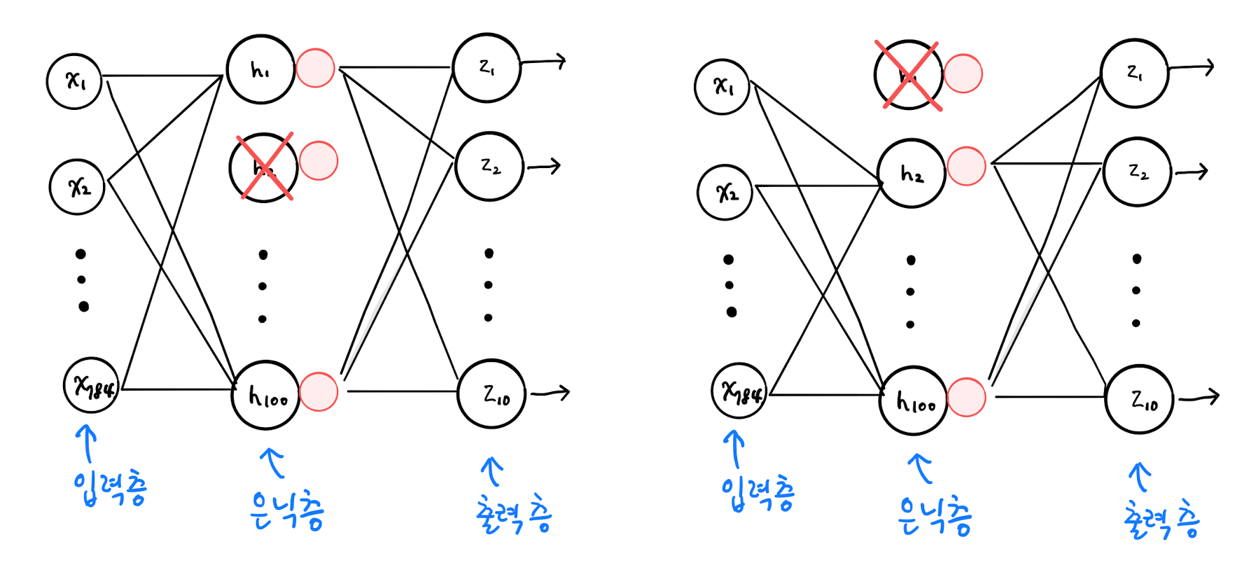

In [ ]:
# 랜덤하게 일부 뉴런을 비활성화
# 뉴런들 간의 상호 의존성 감소
# 앙상블 효과 : 드롭아웃은 다양한 네트워크 구조에서 학습하는 것과 유사한 효과 (다양한 하위모델들)

In [59]:
model = model_fn(keras.layers.Dropout(0.3)) # 30% 드롭아웃

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_9 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [75]:
# 평가나 예측을 수행할 때는 드롭아웃을 적용하지 않는다.
# 텐서플로와 케라스는 이 사항이 반영되어있음

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_scaled, train_target, epochs=20, verbose=2, validation_data=(val_scaled, val_target))

Epoch 1/20
1500/1500 - 6s - 4ms/step - accuracy: 0.8844 - loss: 0.3175 - val_accuracy: 0.8798 - val_loss: 0.3266
Epoch 2/20
1500/1500 - 6s - 4ms/step - accuracy: 0.8870 - loss: 0.3080 - val_accuracy: 0.8826 - val_loss: 0.3290
Epoch 3/20
1500/1500 - 11s - 7ms/step - accuracy: 0.8865 - loss: 0.3048 - val_accuracy: 0.8863 - val_loss: 0.3199
Epoch 4/20
1500/1500 - 11s - 8ms/step - accuracy: 0.8886 - loss: 0.2985 - val_accuracy: 0.8847 - val_loss: 0.3207
Epoch 5/20
1500/1500 - 6s - 4ms/step - accuracy: 0.8899 - loss: 0.2924 - val_accuracy: 0.8810 - val_loss: 0.3235
Epoch 6/20
1500/1500 - 7s - 4ms/step - accuracy: 0.8922 - loss: 0.2900 - val_accuracy: 0.8847 - val_loss: 0.3221
Epoch 7/20
1500/1500 - 6s - 4ms/step - accuracy: 0.8920 - loss: 0.2858 - val_accuracy: 0.8862 - val_loss: 0.3198
Epoch 8/20
1500/1500 - 6s - 4ms/step - accuracy: 0.8958 - loss: 0.2804 - val_accuracy: 0.8854 - val_loss: 0.3191
Epoch 9/20
1500/1500 - 12s - 8ms/step - accuracy: 0.8965 - loss: 0.2768 - val_accuracy: 0.8882

In [79]:
print(history.history)

{'accuracy': [0.7895208597183228, 0.8421249985694885, 0.8522083163261414, 0.8609791398048401, 0.8652291893959045, 0.8709583282470703, 0.8722500205039978, 0.8769375085830688, 0.8783958554267883, 0.8819791674613953], 'loss': [0.5967074036598206, 0.4399062395095825, 0.40849563479423523, 0.38434162735939026, 0.36971956491470337, 0.352224200963974, 0.3431185781955719, 0.336701363325119, 0.32933858036994934, 0.3196348547935486], 'val_accuracy': [0.8464166522026062, 0.8558333516120911, 0.8640000224113464, 0.8700000047683716, 0.8704166412353516, 0.8756666779518127, 0.8769166469573975, 0.878166675567627, 0.8810833096504211, 0.8805833458900452], 'val_loss': [0.4279123544692993, 0.3899124264717102, 0.3693200647830963, 0.3540360629558563, 0.347231924533844, 0.346011221408844, 0.3368231952190399, 0.32988712191581726, 0.3294812738895416, 0.3252719044685364]}


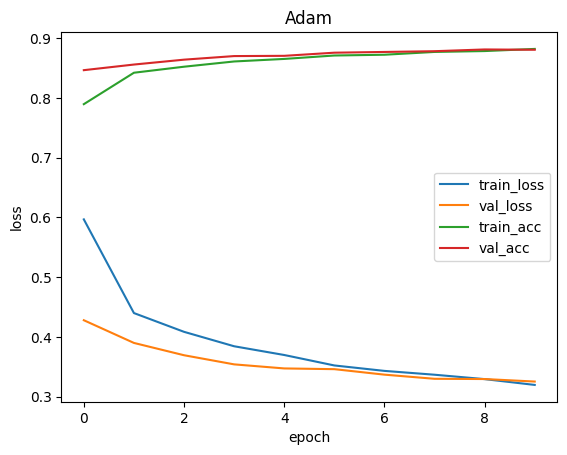

In [78]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Adam')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train_loss', 'val_loss', 'train_acc', 'val_acc'])
plt.show()
# 과대 적합이 확실히 줄어 듬 10번째 에포크가 검증 손실의 감소가 멈추지만 크게 상승하지 않음
# 20번의 에포크를 실행해서 결국 과대 적합이 되었음 -> 10번만 해보자

In [69]:
# 차후에 재활용하기 위해서 모델 저장과 복원도 해본다.
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_scaled, train_target, epochs=10, verbose=0,
                    validation_data=(val_scaled, val_target))

model.save('model-whole.keras') # 모델 저장

# 케라스 모델은 훈련된 모델의 파라미터를 저장하는 save_weights() 메서드가 있다.
# 텐서플로의 체크포인트 포멧으로 저장하지만 https://www.tensorflow.org/guide/checkpoint?hl=ko
# .h5일 경우 HDF5 포멧으로 저장함 https://geunuk.tistory.com/466

model.save_weights('model.weights.h5') # HDF5 형식으로도 저장됨 (폴더에서 확인)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [70]:
!ls -al model*

-rw-r--r-- 1 root root 976600 Mar 17 03:14 model.weights.h5
-rw-r--r-- 1 root root 979394 Mar 17 03:14 model-whole.keras


In [71]:
# 실험 1
# 훈련하지 않은 새로운 모델을 만들고 model.weights.h5 파일에서 훈련된 모델 파라미터를 읽어서 사용

# model_fn() 위와 동일한 모델
model = model_fn(keras.layers.Dropout(0.3)) # 훈련하지 않은 새로운 모델

model.load_weights('model.weights.h5') # 이전에 저장했던 모델 파라미터를 로딩
# 이때 사용하는 메서드는 save_weight()와 쌍을 이루는 load_weight() 메서드 임
# 주의사항 : load_weights() 메서드를 사용하려면 save_weight() 메서드로 저장했던 모델과
# 정확히 같은 구조를 가져야함

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_11 (Flatten)                 │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [80]:
import numpy as np
# predict() 메서드는 사이킷 런과 다른 샘플마다 10개의 클래스에 대한 확률을 반환 (다중분류)

val_labels = np.argmax(model.predict(val_scaled), axis=-1) # 배열의 마지막 차원을 따라 최대값을 고름

# 검증세트는 2차원 배열이기 때문에 마지막 차원은 1이 됨
# 예를 들어 아래 그림처럼 5x3배열에 axis=1로 한값과 axis=0으로 한 값의 인덱스를 반환함 (해당 줄의 최대값의 인덱스값)

# argmax()로 고른 인덱스(val_labels)와 타킷(val_target)을 비교하여 같으면 1이되고 다르면 0이됨
# 이를 평균으로 출력해 봄(정확도)
print(np.mean(val_labels == val_target)) # 87.96% 평균

# axis=1 이면 열을 따라 각 행의 최대값의 인덱스를 선택하고
# axis=0 이면 행을 따라 각 열의 최대값의 인덱스를 선택함.
# 그 다음 라인은 argmax()로 고른 인덱스(val_labels)와 타킷(val_target)을 비교
#   -> 두 배열에서 각 위치의 값이 같이면 1, 다르면 0 (평균하면 정확도가 됨)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
0.8901666666666667


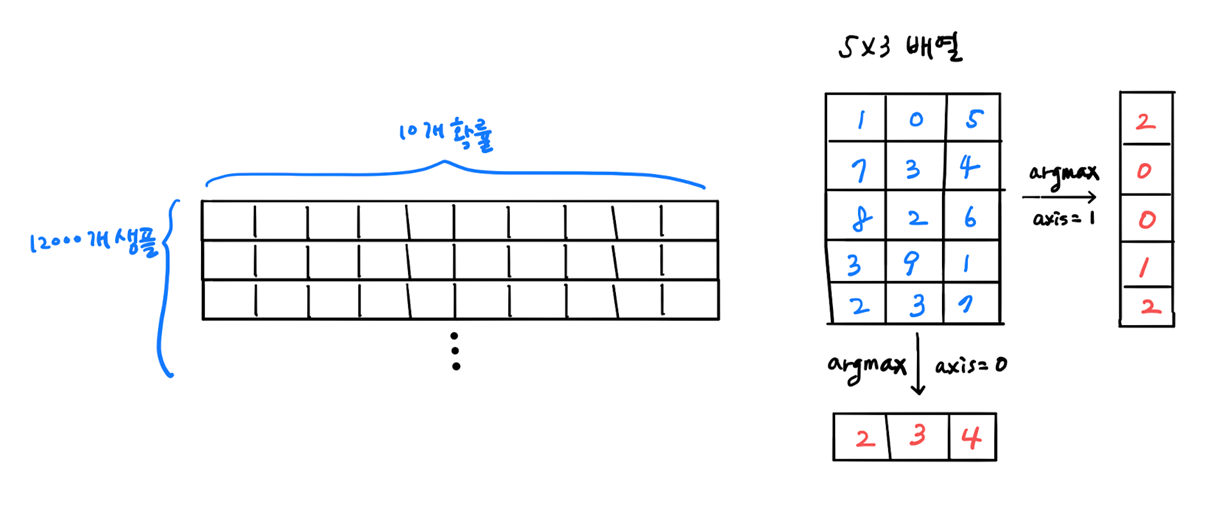

In [81]:
# 모델 전체를 파일에서 읽은 다음 검증 세트의 정확도를 출력 해봄
model = keras.models.load_model('model-whole.keras') # load_model()저장된 케라스 파일 읽기

model.evaluate(val_scaled, val_target) # 같은 모델을 불러 들였기 때문에 위와 정확도가 같음

# 현 상태 분석 : 20번의 에포크 동안 모델을 훈련하여 검증 점수가 상능하는 지점을 확인
# 모델을 과대적합 되지 않은 에포크만큼 다시 훈련함
# 모델을 두번씩 훈련하지 않고 한번에 끝내는 방법을 연구 해보자. -> 케라스 콜백

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8831 - loss: 0.3267


[0.3252719044685364, 0.8805833458900452]

In [84]:
# save_weights 가중치만 파일로 저장
# 모델 architecture를 동일하게 만들어줘야함

In [86]:
# 실험 2
# 콜백 : 훈련과정 중간에 어떤 작업을 수행할 수 있게 해주는 객체
# fit() 메서드의 callback 매개변수에 리스트로 전달하여 사용
# ModelCheckpoint 콜백 - epoch마다 모델을 저장
# save_best_only = True 최상의 검증 점수를 만드는 모델을 저장

model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.keras', save_best_only=True)

model.fit(train_scaled, train_target, epochs=20, verbose=2, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb])
# best-model.keras 에 저장됨

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
1500/1500 - 6s - 4ms/step - accuracy: 0.7925 - loss: 0.5966 - val_accuracy: 0.8397 - val_loss: 0.4384
Epoch 2/20
1500/1500 - 6s - 4ms/step - accuracy: 0.8392 - loss: 0.4407 - val_accuracy: 0.8594 - val_loss: 0.3902
Epoch 3/20
1500/1500 - 5s - 4ms/step - accuracy: 0.8526 - loss: 0.4044 - val_accuracy: 0.8618 - val_loss: 0.3742
Epoch 4/20
1500/1500 - 5s - 3ms/step - accuracy: 0.8614 - loss: 0.3830 - val_accuracy: 0.8633 - val_loss: 0.3650
Epoch 5/20
1500/1500 - 6s - 4ms/step - accuracy: 0.8666 - loss: 0.3638 - val_accuracy: 0.8749 - val_loss: 0.3459
Epoch 6/20
1500/1500 - 10s - 7ms/step - accuracy: 0.8705 - loss: 0.3535 - val_accuracy: 0.8777 - val_loss: 0.3363
Epoch 7/20
1500/1500 - 11s - 7ms/step - accuracy: 0.8742 - loss: 0.3422 - val_accuracy: 0.8780 - val_loss: 0.3312
Epoch 8/20
1500/1500 - 5s - 3ms/step - accuracy: 0.8778 - loss: 0.3321 - val_accuracy: 0.8779 - val_loss: 0.3342
Epoch 9/20
1500/1500 - 5s - 3ms/step - accuracy: 0.8804 - loss: 0.3242 - val_accuracy: 0.8786 

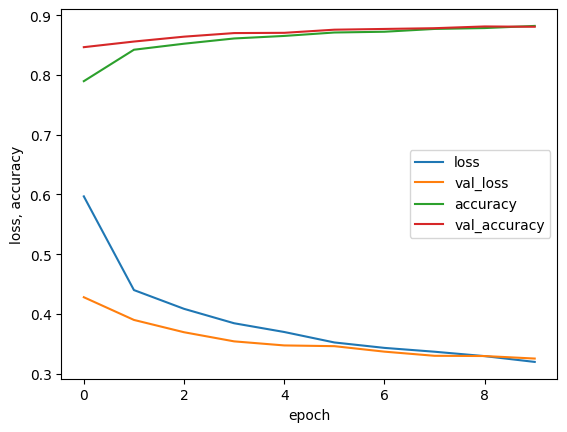

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8902 - loss: 0.3210


[0.3251771926879883, 0.890666663646698]

In [87]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('loss, accuracy')
plt.legend(['loss', 'val_loss','accuracy', 'val_accuracy'])
plt.show()
model.evaluate(val_scaled, val_target) # 검증세트의 성능 확인 (33.10%, 87.99%) 에포크 9번
# 20번 중 가장 val_loss 가 낮은 9번째 epoch를 저장

In [ ]:
# loss 가 증가하기 시작하면 과대적합 가능성 -> 조기종료로 자원과 시간절약 및 규제효과
# Keras 의 EarlyStopping 콜백
# patience(인내심) 매개변수는 n회 연속으로 향상되지 않으면 훈련을 중지할 n 을 지정
# restore_best_weights = True  -> 가장 낮은 loss 모델 저장

In [88]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.keras', save_best_only=True)

early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True) # monitor 파라미터는 기본적으로 val_loss가 설정

history = model.fit(train_scaled, train_target, epochs=20, verbose=2, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
1500/1500 - 8s - 5ms/step - accuracy: 0.7921 - loss: 0.5924 - val_accuracy: 0.8453 - val_loss: 0.4242
Epoch 2/20
1500/1500 - 9s - 6ms/step - accuracy: 0.8421 - loss: 0.4399 - val_accuracy: 0.8577 - val_loss: 0.3833
Epoch 3/20
1500/1500 - 10s - 6ms/step - accuracy: 0.8537 - loss: 0.4040 - val_accuracy: 0.8689 - val_loss: 0.3652
Epoch 4/20
1500/1500 - 6s - 4ms/step - accuracy: 0.8604 - loss: 0.3811 - val_accuracy: 0.8680 - val_loss: 0.3558
Epoch 5/20
1500/1500 - 5s - 4ms/step - accuracy: 0.8670 - loss: 0.3663 - val_accuracy: 0.8747 - val_loss: 0.3417
Epoch 6/20
1500/1500 - 7s - 4ms/step - accuracy: 0.8711 - loss: 0.3509 - val_accuracy: 0.8751 - val_loss: 0.3346
Epoch 7/20
1500/1500 - 5s - 3ms/step - accuracy: 0.8729 - loss: 0.3439 - val_accuracy: 0.8775 - val_loss: 0.3331
Epoch 8/20
1500/1500 - 10s - 7ms/step - accuracy: 0.8770 - loss: 0.3348 - val_accuracy: 0.8791 - val_loss: 0.3347
Epoch 9/20
1500/1500 - 11s - 7ms/step - accuracy: 0.8790 - loss: 0.3252 - val_accuracy: 0.8793

In [89]:
print(early_stopping_cb.stopped_epoch)  # 조기종료 시점 에포크

8


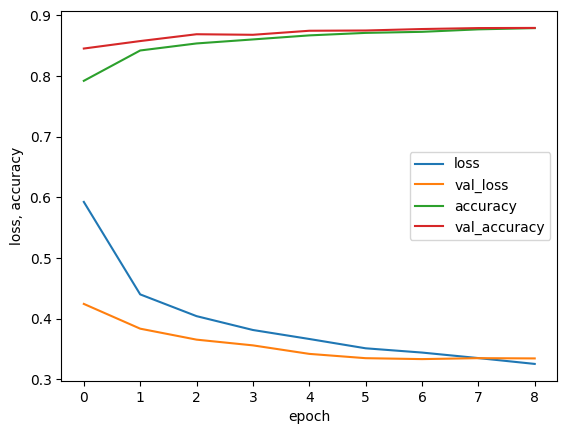

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8792 - loss: 0.3324


[0.33312132954597473, 0.8774999976158142]

In [90]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('loss, accuracy')
plt.legend(['loss', 'val_loss','accuracy', 'val_accuracy'])
plt.show()
model.evaluate(val_scaled, val_target) # 검증세트의 성능 확인 (33.10%, 87.99%) 에포크 9번
# 컴퓨터의 자원과 시간을 아끼고 콜백과 함꼐 사용하면 최상의 모델을 자동으로 저장해 준다는 것을 명심

In [83]:
# 현재 저장된 모델 찾기
# globals()에서 미리 항목을 리스트로 저장하고 반복
for name, obj in list(globals().items()):
    if isinstance(obj, keras.Model):
        # 옵티마이저가 설정되어 있는지 확인
        if hasattr(obj, 'optimizer') and obj.optimizer is not None:
            optimizer_name = obj.optimizer.__class__.__name__  # 옵티마이저의 클래스 이름 가져오기
        else:
            optimizer_name = 'None'  # 옵티마이저가 설정되지 않았으면 None으로 처리

        print(f"변수명: {name}, 모델명: {obj.name}, 옵티마이저: {optimizer_name}")


# keras.Sequential()을 처음 생성할 때, 변수에 저장하지 않고 즉시 버려졌다면 globals()에서 찾을 수 없음
# 모델명 초기화(변경) 방법
# 방법 1: name을 수동으로 지정
# 방법 2: tf.keras.backend.clear_session() 사용  -> 자동생성이름 sequential 로 초기화

변수명: model, 모델명: sequential_10, 옵티마이저: Adam
